# Simple Image preprocessing & Simple CNN model

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

## Explore Data

### reference https://www.kaggle.com/code/ryanholbrook/create-your-first-submission/notebook

In [2]:
import tensorflow as tf
import numpy as np
import os
import glob
import warnings
warnings.filterwarnings('ignore')

ROOT_DIR = '/kaggle/input/tpu-getting-started'
DATA_SIZE_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*'))

DATA_DIRS = []
for DATA_SIZE_DIR in DATA_SIZE_DIRS:
    _data_dir = glob.glob(DATA_SIZE_DIR + '/train/*')[0]
    DATA_DIRS += [_data_dir]

In [3]:
CLASSES = ['pink primrose',    'hard-leaved pocket orchid', 'canterbury bells', 'sweet pea',     'wild geranium',     'tiger lily',           'moon orchid',              'bird of paradise', 'monkshood',        'globe thistle',         # 00 - 09
           'snapdragon',       "colt's foot",               'king protea',      'spear thistle', 'yellow iris',       'globe-flower',         'purple coneflower',        'peruvian lily',    'balloon flower',   'giant white arum lily', # 10 - 19
           'fire lily',        'pincushion flower',         'fritillary',       'red ginger',    'grape hyacinth',    'corn poppy',           'prince of wales feathers', 'stemless gentian', 'artichoke',        'sweet william',         # 20 - 29
           'carnation',        'garden phlox',              'love in the mist', 'cosmos',        'alpine sea holly',  'ruby-lipped cattleya', 'cape flower',              'great masterwort', 'siam tulip',       'lenten rose',           # 30 - 39
           'barberton daisy',  'daffodil',                  'sword lily',       'poinsettia',    'bolero deep blue',  'wallflower',           'marigold',                 'buttercup',        'daisy',            'common dandelion',      # 40 - 49
           'petunia',          'wild pansy',                'primula',          'sunflower',     'lilac hibiscus',    'bishop of llandaff',   'gaura',                    'geranium',         'orange dahlia',    'pink-yellow dahlia',    # 50 - 59
           'cautleya spicata', 'japanese anemone',          'black-eyed susan', 'silverbush',    'californian poppy', 'osteospermum',         'spring crocus',            'iris',             'windflower',       'tree poppy',            # 60 - 69
           'gazania',          'azalea',                    'water lily',       'rose',          'thorn apple',       'morning glory',        'passion flower',           'lotus',            'toad lily',        'anthurium',             # 70 - 79
           'frangipani',       'clematis',                  'hibiscus',         'columbine',     'desert-rose',       'tree mallow',          'magnolia',                 'cyclamen ',        'watercress',       'canna lily',            # 80 - 89
           'hippeastrum ',     'bee balm',                  'pink quill',       'foxglove',      'bougainvillea',     'camellia',             'mallow',                   'mexican petunia',  'bromelia',         'blanket flower',        # 90 - 99
           'trumpet creeper',  'blackberry lily',           'common tulip',     'wild rose'] 

In [4]:
def tfrecord_func(example):
    TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'class': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    
    image = tf.cast(tf.image.decode_jpeg(example['image'], channels=3), tf.int32)
    label = tf.cast(example['class'], tf.int32)
    return image, label

dataset = tf.data.TFRecordDataset(DATA_DIRS)
dataset = dataset.map(tfrecord_func)

2022-09-01 07:58:19.676205: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 07:58:19.852826: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 07:58:19.853994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 07:58:19.860211: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
dataset_iter = dataset.as_numpy_iterator()

2022-09-01 07:58:22.817766: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


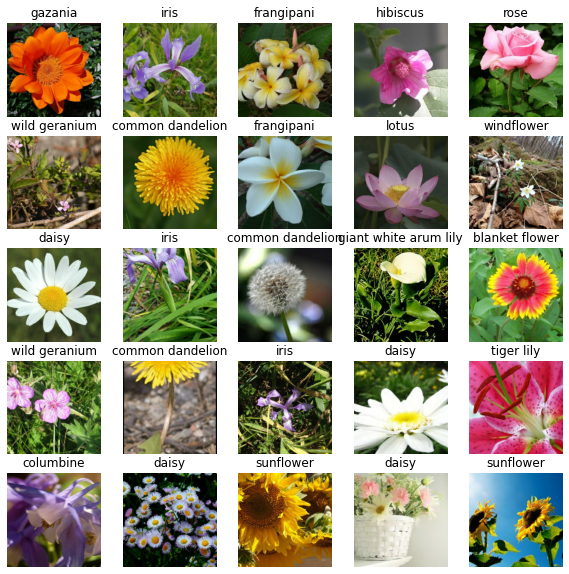

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    image, label = next(dataset_iter)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(CLASSES[label])
    plt.axis('off')
plt.show()

In [7]:
image, label = next(dataset_iter)
image.shape

(224, 224, 3)

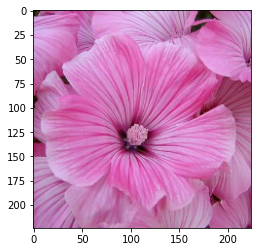

In [8]:
plt.imshow(image)

In [9]:
image_ = tf.image.resize(image, (100, 100), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
import cv2
image_ = cv2.resize(image.astype(np.int16), (100,100))
image_.shape

(100, 100, 3)

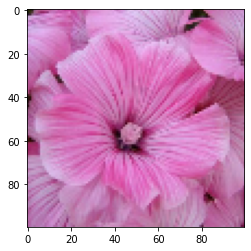

In [10]:
plt.imshow(image_)

## Load Data

In [11]:
TRAIN_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*/train/*'))
VAL_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*/val/*'))
TEST_DIRS = glob.glob(str(ROOT_DIR + '/*-jpeg-*/test/*'))

In [12]:
TRAIN_LEN = sum(1 for _ in tf.data.TFRecordDataset(TRAIN_DIRS, num_parallel_reads=tf.data.AUTOTUNE))
VAL_LEN = sum(1 for _ in tf.data.TFRecordDataset(VAL_DIRS, num_parallel_reads=tf.data.AUTOTUNE))
TEST_LEN = sum(1 for _ in tf.data.TFRecordDataset(TEST_DIRS, num_parallel_reads=tf.data.AUTOTUNE))
TRAIN_LEN, VAL_LEN, TEST_LEN

(51012, 14848, 29528)

In [13]:
def train_tfrecord(example):
    TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'class': tf.io.FixedLenFeature([], tf.int64)
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.image.resize(image, (350, 350), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.cast(example['class'], tf.int32)
    return image, label

def test_tfrecord(example):
    TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string), 
        'id': tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, TFREC_FORMAT)
    image = tf.image.decode_jpeg(example['image'], channels=3)
    image = tf.image.resize(image, (350, 350), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    image = tf.cast(image, tf.float32) / 255.0
    idn = example['id']
    return image, idn

def load_dataset(dirs, train=True, label=True, batch_size=32):
    dataset = tf.data.TFRecordDataset(dirs, num_parallel_reads=tf.data.AUTOTUNE)
    options = tf.data.Options()
    options.experimental_deterministic = False
    dataset = dataset.with_options(options)
    dataset = dataset.map(train_tfrecord if label else test_tfrecord, 
                          num_parallel_calls=tf.data.AUTOTUNE)
    if train:
        dataset = dataset.repeat().shuffle(2048)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset

In [14]:
BATCH_SIZE = 16
train_dataset = load_dataset(TRAIN_DIRS, train=True, label=True, batch_size=BATCH_SIZE)
val_dataset = load_dataset(VAL_DIRS, train=False, label=True, batch_size=BATCH_SIZE)
test_dataset = load_dataset(TEST_DIRS, train=False, label=False, batch_size=BATCH_SIZE)

print(train_dataset)
print(val_dataset)
print(test_dataset)

<PrefetchDataset shapes: ((None, 350, 350, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 350, 350, 3), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 350, 350, 3), (None,)), types: (tf.float32, tf.string)>


## Model

In [15]:
class CBDPBlock(tf.keras.layers.Layer):
    def __init__(self, kernel_size, filters, dropout):
        super(CBDPBlock, self).__init__()
        self.conv = tf.keras.layers.Conv2D(
            filters, kernel_size, padding='same')
        self.bn = tf.keras.layers.BatchNormalization()
        self.act = tf.keras.layers.Activation('relu')
        self.dp = tf.keras.layers.Dropout(dropout)
        self.pool = tf.keras.layers.MaxPool2D()
    
    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        x = self.act(x)
        x = self.dp(x)
        x = self.pool(x)
        return x
    
class DBDBlock(tf.keras.layers.Layer):
    def __init__(self, units, dropout):
        super(DBDBlock, self).__init__()
        self.dense = tf.keras.layers.Dense(units)
        self.bn = tf.keras.layers.BatchNormalization()
        self.act = tf.keras.layers.Activation('relu')
        self.dp = tf.keras.layers.Dropout(dropout)
    
    def call(self, x):
        x = self.dense(x)
        x = self.bn(x)
        x = self.act(x)
        x = self.dp(x)
        return x
        
class SimpleCNN(tf.keras.Model):
    def __init__(self, n_layers, kernel_size, filters, dropout, units):
        super(SimpleCNN, self).__init__()
        self.hidden = [CBDPBlock(kernel_size, filters, dropout) 
                       for _ in range(n_layers)]
#         self.flatten = tf.keras.layers.Flatten()
#         self.d_block = DBDBlock(units, dropout)
        self.globalpool = tf.keras.layers.GlobalAveragePooling2D()
        self.dense = tf.keras.layers.Dense(len(CLASSES))
    
    def call(self, x):
        for block in self.hidden:
            x = block(x)
#         x = self.flatten(x)
#         x = self.d_block(x)
        x = self.globalpool(x)
        x = self.dense(x)
        return x
    
    def summary(self):
        x = tf.keras.layers.Input(shape=(350, 350, 3))
        model = tf.keras.Model(inputs=[x], outputs=self.call(x))
        return model.summary()

In [16]:
import tensorflow_addons as tfa

model = SimpleCNN(n_layers=4, kernel_size=3, filters=200, dropout=0.7, units=100)
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
             metrics=['accuracy', tfa.metrics.F1Score(num_classes=len(CLASSES), average='macro')])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 350, 350, 3)]     0         
_________________________________________________________________
cbdp_block (CBDPBlock)       (None, 175, 175, 200)     6400      
_________________________________________________________________
cbdp_block_1 (CBDPBlock)     (None, 87, 87, 200)       361000    
_________________________________________________________________
cbdp_block_2 (CBDPBlock)     (None, 43, 43, 200)       361000    
_________________________________________________________________
cbdp_block_3 (CBDPBlock)     (None, 21, 21, 200)       361000    
_________________________________________________________________
global_average_pooling2d (Gl (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 104)               20904 

In [17]:
# model.fit(train_dataset, epochs=10, validation_data=val_dataset, 
#          steps_per_epoch=TRAIN_LEN // BATCH_SIZE)

### https://stackoverflow.com/questions/70589698/tensorflow-compute-precision-recall-f1-score => macro f1 score
### error => macro f1 score label shape => onehot